# Stock Market Prediction and Forecasting Using Stacked LSTM

## Data Collection and Transformation

In [4]:
import pandas_datareader as pdr 
key="" #removed for security reasons

In [5]:
df = pdr.get_data_tiingo("AAPL",api_key=key)

/tmp/ipykernel_9150/2203687756.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo("AAPL",api_key=key)


In [6]:
df.to_csv("AAPL.csv")

In [7]:
#making a dataframe for the extracted data
import pandas as pd

df = pd.read_csv("AAPL.csv")

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-23 00:00:00+00:00,191.61,191.96,189.56,190.68,15989365,45.775378,45.858993,45.285636,45.553203,63957460,0.0,1.0
1,AAPL,2018-07-24 00:00:00+00:00,193.00,193.66,192.05,192.45,18697898,46.107448,46.265121,45.880494,45.976053,74791592,0.0,1.0
2,AAPL,2018-07-25 00:00:00+00:00,194.82,194.85,192.43,193.06,16826483,46.542243,46.549410,45.971275,46.121782,67305932,0.0,1.0
3,AAPL,2018-07-26 00:00:00+00:00,194.21,195.96,193.61,194.61,19075964,46.396515,46.814588,46.253176,46.492075,76303856,0.0,1.0
4,AAPL,2018-07-27 00:00:00+00:00,190.98,195.19,190.10,194.99,24023972,45.624872,46.630636,45.414641,46.582856,96095888,0.0,1.0


In [9]:
df.tail()

In [10]:
#resetting index
df1 = df.reset_index()["open"]
df1

0       190.68
1       192.45
2       193.06
3       194.61
4       194.99
         ...  
1252    190.23
1253    191.90
1254    193.35
1255    193.10
1256    195.09
Name: open, Length: 1257, dtype: float64

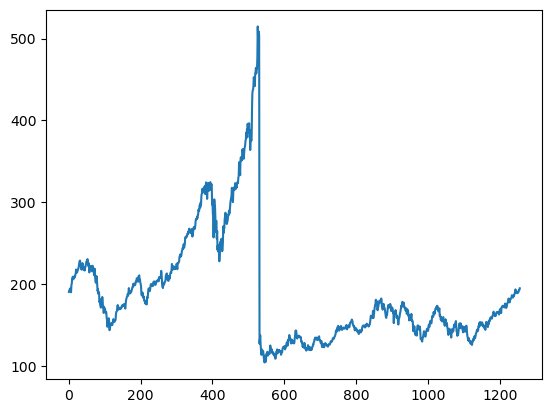

In [11]:
#visualizing current data
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np
df1

0       190.68
1       192.45
2       193.06
3       194.61
4       194.99
         ...  
1252    190.23
1253    191.90
1254    193.35
1255    193.10
1256    195.09
Name: open, Length: 1257, dtype: float64

In [13]:
#LSTM are sensitive to the scale of the data, so we apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#converting the df1 into array and reshapes it to have a single column
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) 

In [14]:
df1

array([[0.20996953],
       [0.21428397],
       [0.21577087],
       ...,
       [0.21647776],
       [0.21586837],
       [0.22071907]])

## Train and Test Split for LSTM

In [15]:
#splitting 70% of data for training and rest 30% for test
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(879, 378)

In [17]:
train_data

array([[0.20996953],
       [0.21428397],
       [0.21577087],
       [0.21954906],
       [0.22047532],
       [0.21294333],
       [0.20904327],
       [0.23056673],
       [0.23410116],
       [0.24982328],
       [0.25218769],
       [0.25540524],
       [0.24743449],
       [0.25043266],
       [0.25062767],
       [0.25145643],
       [0.25745277],
       [0.25516149],
       [0.26132846],
       [0.2654479 ],
       [0.27680683],
       [0.27363803],
       [0.26705667],
       [0.26839732],
       [0.27315052],
       [0.27449116],
       [0.27902498],
       [0.28180378],
       [0.28936015],
       [0.29730652],
       [0.30193784],
       [0.30335161],
       [0.29662401],
       [0.28594759],
       [0.28375381],
       [0.27658745],
       [0.29347959],
       [0.29001828],
       [0.29545399],
       [0.28667885],
       [0.27605119],
       [0.27778184],
       [0.28202316],
       [0.28333943],
       [0.27368678],
       [0.28082876],
       [0.28387569],
       [0.290

In [18]:
test_data

array([[0.16324193],
       [0.15956124],
       [0.15219988],
       [0.14594759],
       [0.13523461],
       [0.13269957],
       [0.14371725],
       [0.14115783],
       [0.1491042 ],
       [0.15995125],
       [0.16933577],
       [0.17112736],
       [0.17048141],
       [0.16365631],
       [0.1665326 ],
       [0.16377818],
       [0.17430835],
       [0.16965265],
       [0.16524071],
       [0.15315052],
       [0.16192566],
       [0.16407069],
       [0.16207191],
       [0.15912249],
       [0.1473248 ],
       [0.14868982],
       [0.11709933],
       [0.14454601],
       [0.14264473],
       [0.1466301 ],
       [0.14588665],
       [0.15583181],
       [0.14613041],
       [0.14337599],
       [0.13230957],
       [0.13878123],
       [0.13567337],
       [0.1325777 ],
       [0.11434491],
       [0.11300427],
       [0.12799512],
       [0.13179768],
       [0.13642901],
       [0.14374162],
       [0.1486167 ],
       [0.15466179],
       [0.16214503],
       [0.169

In [19]:
#making a function to convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] #i=0   0,1,2,3....
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX), np.array(dataY)

In [20]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(728, 150)
(728,)


(None, None)

In [22]:
print(X_test.shape), print(y_test.shape)

(227, 150)
(227,)


(None, None)

In [23]:
#reshape input into 3d i.e, [samples, time_steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
X_train

array([[[0.20996953],
        [0.21428397],
        [0.21577087],
        ...,
        [0.16341255],
        [0.1697014 ],
        [0.16860451]],

       [[0.21428397],
        [0.21577087],
        [0.21954906],
        ...,
        [0.1697014 ],
        [0.16860451],
        [0.16738574]],

       [[0.21577087],
        [0.21954906],
        [0.22047532],
        ...,
        [0.16860451],
        [0.16738574],
        [0.17009141]],

       ...,

       [[0.05525899],
        [0.05479586],
        [0.05360146],
        ...,
        [0.1661426 ],
        [0.16660573],
        [0.15731871]],

       [[0.05479586],
        [0.05360146],
        [0.05674589],
        ...,
        [0.16660573],
        [0.15731871],
        [0.16521633]],

       [[0.05360146],
        [0.05674589],
        [0.06191347],
        ...,
        [0.15731871],
        [0.16521633],
        [0.17447898]]])

In [25]:
X_test

array([[[0.16324193],
        [0.15956124],
        [0.15219988],
        ...,
        [0.16870201],
        [0.16694698],
        [0.15880561]],

       [[0.15956124],
        [0.15219988],
        [0.14594759],
        ...,
        [0.16694698],
        [0.15880561],
        [0.15244363]],

       [[0.15219988],
        [0.14594759],
        [0.13523461],
        ...,
        [0.15880561],
        [0.15244363],
        [0.15302864]],

       ...,

       [[0.09177331],
        [0.09218769],
        [0.09213894],
        ...,
        [0.20753199],
        [0.20953077],
        [0.20887264]],

       [[0.09218769],
        [0.09213894],
        [0.09301645],
        ...,
        [0.20953077],
        [0.20887264],
        [0.21294333]],

       [[0.09213894],
        [0.09301645],
        [0.10959171],
        ...,
        [0.20887264],
        [0.21294333],
        [0.21647776]]])

## Defining Stacked LSTM Model

In [26]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 467.1 kB/s eta 0:00:00m eta 0:00:010:00:12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 340.0 kB/s eta 0:00:002.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 671.8 kB/s eta 0:00:001m776.2 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 914.2 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 679.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 1.6 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 807.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 1.7 MB/s eta 0:00:001.6 MB/s eta 0:00:01
     ━━━━━━━━━━

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install TensorRT

  Preparing metadata (setup.py) ... done
  Created wheel for TensorRT: filename=tensorrt-8.6.1-py2.py3-none-any.whl size=16971 sha256=eabe7a62eea38e1e997f44fb1b7210305185ff475b1dc80d1548e6abdaf56494
  Stored in directory: /home/yashraj/.cache/pip/wheels/e0/6b/4e/e2fa4f132c650e4fb0bcb573c67d35cd58ad4889fdebfc0a76
Successfully built TensorRT
Note: you may need to restart the kernel to use updated packages.


In [28]:
#importing libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-07-21 14:42:32.696717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 14:42:32.866484: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 14:42:32.867639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 14:42:33.869978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

2023-07-21 14:42:34.864201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 14:42:34.865958: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training Model

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 234ms/step - loss: 0.0355 - val_loss: 8.0160e-04
Epoch 2/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0146 - val_loss: 0.0033
Epoch 3/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0112 - val_loss: 3.0949e-04
Epoch 4/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0085 - val_loss: 2.9193e-04
Epoch 5/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0080 - val_loss: 3.9695e-04
Epoch 6/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0074 - val_loss: 4.1284e-04
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0069 - val_loss: 3.9899e-04
Epoch 8/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0062 - val_loss: 9.6871e-04
Epoch 9/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0057 - val_loss: 6.6178e-04
Epoch 10/100
12/12 [==============================] - 2s 13

## Prediction & Performance Metrics 

In [32]:
import tensorflow as tf

In [33]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 30ms/step


In [34]:
#transfoeming to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.65042342693036

In [36]:
#Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

154.20594526272518

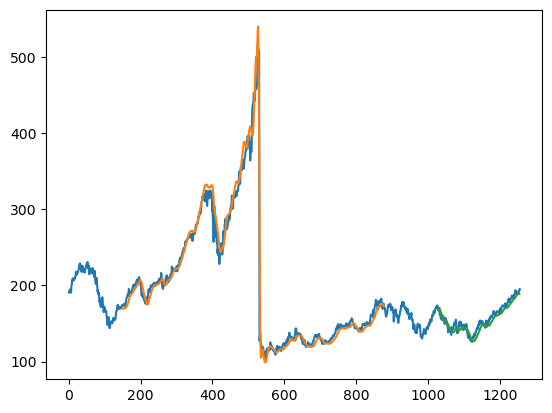

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Making prediction for next 30 days

In [43]:
len(test_data)

378

In [48]:
x_input=test_data[228:].reshape(1,-1)
x_input.shape

(1, 150)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.10959171237050574,
 0.09947592931139543,
 0.08914076782449726,
 0.07835466179159045,
 0.07451553930530164,
 0.06544789762340031,
 0.06932358318098714,
 0.0726678854357099,
 0.06430225472272999,
 0.065423522242535,
 0.06125533211456424,
 0.05716026812918945,
 0.05818403412553319,
 0.06274223034734916,
 0.05447897623400361,
 0.05506398537477142,
 0.052333942717854964,
 0.06319317489335768,
 0.0626934795856185,
 0.06510664229128577,
 0.0715173674588665,
 0.0670079219987812,
 0.0738330286410725,
 0.07867154174283969,
 0.07200487507617304,
 0.07492992078001215,
 0.08185252894576478,
 0.08717854966483851,
 0.08860450944546,
 0.09416209628275435,
 0.09412553321145639,
 0.09851310176721512,
 0.09301645338208403,
 0.09611212675198044,
 0.10812918951858619,
 0.10600853138330285,
 0.11708714198659348,
 0.11237050578915292,
 0.12026812918951857,
 0.12001218769043265,
 0.10949421084704447,
 0.11313101767215111,
 0.11597806215722117,
 0.1183912248628885,
 0.11936624009750146,
 0.11653869591712368

In [54]:
#demonstration prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input) > 150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.09947593 0.08914077 0.07835466 0.07451554 0.0654479  0.06932358
 0.07266789 0.06430225 0.06542352 0.06125533 0.05716027 0.05818403
 0.06274223 0.05447898 0.05506399 0.05233394 0.06319317 0.06269348
 0.06510664 0.07151737 0.06700792 0.07383303 0.07867154 0.07200488
 0.07492992 0.08185253 0.08717855 0.08860451 0.0941621  0.09412553
 0.0985131  0.09301645 0.09611213 0.10812919 0.10600853 0.11708714
 0.11237051 0.12026813 0.12001219 0.10949421 0.11313102 0.11597806
 0.11839122 0.11936624 0.1165387  0.11129799 0.10805606 0.11102986
 0.103766   0.10522852 0.10361974 0.10308349 0.09711152 0.10604509
 0.12003656 0.11982937 0.11765996 0.11948568 0.11132236 0.10546009
 0.11393053 0.11371115 0.11607556 0.12563071 0.1231688  0.12865326
 0.13347959 0.13233394 0.13240707 0.13503961 0.13023766 0.13365021
 0.1389153  0.14113346 0.14559415 0.15126143 0.14673979 0.14110908
 0.13864717 0.14091408 0.13815966 0.13915905 0.14637416 0.14759293
 0.15005484 0.14932358 0.15003047 0.14749543 0.147

7 day output [[0.20507051]]
8 day input [0.06542352 0.06125533 0.05716027 0.05818403 0.06274223 0.05447898
 0.05506399 0.05233394 0.06319317 0.06269348 0.06510664 0.07151737
 0.06700792 0.07383303 0.07867154 0.07200488 0.07492992 0.08185253
 0.08717855 0.08860451 0.0941621  0.09412553 0.0985131  0.09301645
 0.09611213 0.10812919 0.10600853 0.11708714 0.11237051 0.12026813
 0.12001219 0.10949421 0.11313102 0.11597806 0.11839122 0.11936624
 0.1165387  0.11129799 0.10805606 0.11102986 0.103766   0.10522852
 0.10361974 0.10308349 0.09711152 0.10604509 0.12003656 0.11982937
 0.11765996 0.11948568 0.11132236 0.10546009 0.11393053 0.11371115
 0.11607556 0.12563071 0.1231688  0.12865326 0.13347959 0.13233394
 0.13240707 0.13503961 0.13023766 0.13365021 0.1389153  0.14113346
 0.14559415 0.15126143 0.14673979 0.14110908 0.13864717 0.14091408
 0.13815966 0.13915905 0.14637416 0.14759293 0.15005484 0.14932358
 0.15003047 0.14749543 0.14737355 0.14783668 0.14263254 0.14783668
 0.15588056 0.15780622

15 day output [[0.1980798]]
16 day input [0.06319317 0.06269348 0.06510664 0.07151737 0.06700792 0.07383303
 0.07867154 0.07200488 0.07492992 0.08185253 0.08717855 0.08860451
 0.0941621  0.09412553 0.0985131  0.09301645 0.09611213 0.10812919
 0.10600853 0.11708714 0.11237051 0.12026813 0.12001219 0.10949421
 0.11313102 0.11597806 0.11839122 0.11936624 0.1165387  0.11129799
 0.10805606 0.11102986 0.103766   0.10522852 0.10361974 0.10308349
 0.09711152 0.10604509 0.12003656 0.11982937 0.11765996 0.11948568
 0.11132236 0.10546009 0.11393053 0.11371115 0.11607556 0.12563071
 0.1231688  0.12865326 0.13347959 0.13233394 0.13240707 0.13503961
 0.13023766 0.13365021 0.1389153  0.14113346 0.14559415 0.15126143
 0.14673979 0.14110908 0.13864717 0.14091408 0.13815966 0.13915905
 0.14637416 0.14759293 0.15005484 0.14932358 0.15003047 0.14749543
 0.14737355 0.14783668 0.14263254 0.14783668 0.15588056 0.15780622
 0.15978062 0.15834247 0.14710542 0.16193784 0.16560634 0.16699573
 0.16692261 0.1689457

23 day output [[0.19048049]]
24 day input [0.07492992 0.08185253 0.08717855 0.08860451 0.0941621  0.09412553
 0.0985131  0.09301645 0.09611213 0.10812919 0.10600853 0.11708714
 0.11237051 0.12026813 0.12001219 0.10949421 0.11313102 0.11597806
 0.11839122 0.11936624 0.1165387  0.11129799 0.10805606 0.11102986
 0.103766   0.10522852 0.10361974 0.10308349 0.09711152 0.10604509
 0.12003656 0.11982937 0.11765996 0.11948568 0.11132236 0.10546009
 0.11393053 0.11371115 0.11607556 0.12563071 0.1231688  0.12865326
 0.13347959 0.13233394 0.13240707 0.13503961 0.13023766 0.13365021
 0.1389153  0.14113346 0.14559415 0.15126143 0.14673979 0.14110908
 0.13864717 0.14091408 0.13815966 0.13915905 0.14637416 0.14759293
 0.15005484 0.14932358 0.15003047 0.14749543 0.14737355 0.14783668
 0.14263254 0.14783668 0.15588056 0.15780622 0.15978062 0.15834247
 0.14710542 0.16193784 0.16560634 0.16699573 0.16692261 0.16894576
 0.16838513 0.16726386 0.16441194 0.16372943 0.16687386 0.17513711
 0.16926264 0.167190

In [59]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

1257

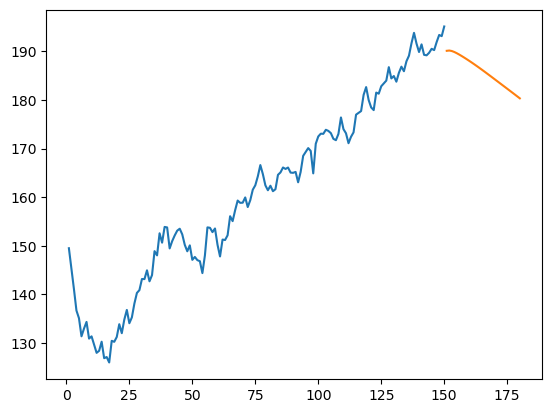

In [62]:
plt.plot(day_new,scaler.inverse_transform(df1[1107:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

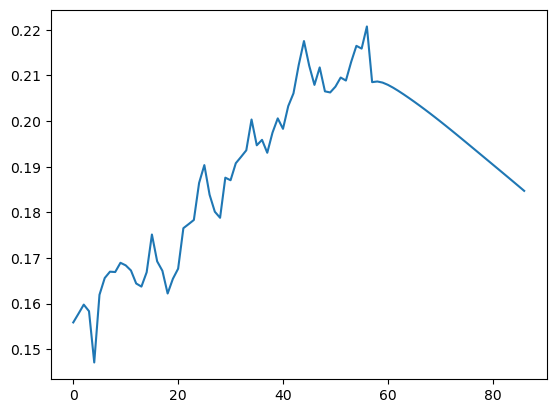

In [63]:
#magnified view of graph
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

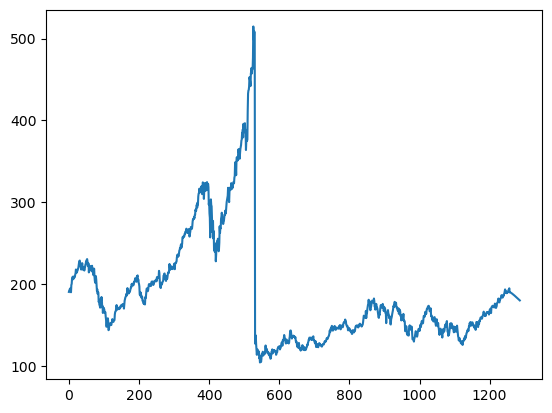

In [64]:
#whole graph
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)